In [2]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [3]:
mp_pose=mp.solutions.pose
pose=mp_pose.Pose(static_image_mode=True,min_detection_confidence=0.3,model_complexity=2)
mp_drawing=mp.solutions.drawing_utils

In [4]:
def calculateAngle(landmark1,landmark2,landmark3):
    x1,y1,_=landmark1
    x2,y2,_=landmark2
    x3,y3,_=landmark3
    angle=math.degrees(math.atan2(y3-y2,x3-x2)-math.atan2(y1-y2,x1-x2))
    if angle<0:
        angle+=360
    return angle

In [5]:
def detectPose(image, pose, display=True):
  output_image=image.copy()
  imageRGB=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results=pose.process(imageRGB)
  height, width, _ = image.shape
  landmarks=[]
  if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
    for landmark in results.pose_landmarks.landmark:
      landmarks.append((int(landmark.x*width),int(landmark.y*height),(landmark.z*width)))
  if display:
    plt.figure(figsize=[22,22])
    plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
    plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

    mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
  else:
    return output_image, landmarks

In [6]:
def classifyPose(landmarks,output_image,display=False):
    label='Incorrect Pose'
    color=(0,0,255)
    left_elbow_angle=calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    right_elbow_angle=calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])
    left_shoulder_angle=calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    right_shoulder_angle=calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    left_knee_angle=calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    right_knee_angle=calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    if left_elbow_angle>165 and left_elbow_angle<195 and right_elbow_angle>165 and right_elbow_angle<195:
        if left_shoulder_angle>80 and left_shoulder_angle<110 and right_shoulder_angle>80 and right_shoulder_angle<110:
            if left_knee_angle>165 and left_knee_angle<270 or right_knee_angle>165 and right_knee_angle<195:
                if left_knee_angle>90 and left_knee_angle<270 or right_knee_angle>90 and right_knee_angle<120:
                    label='Correct Warrior pose'
    if left_knee_angle>165 and left_knee_angle<195 or right_knee_angle>165 and right_knee_angle<195:
        if left_knee_angle>315 and left_knee_angle<335 or right_knee_angle>25 and right_knee_angle<45:
            label='Correct Tree Pose'
            
    if label!='Incorrect Pose':
        color=(0,255,0)
        
    cv2.putText(output_image,label,(10,30),cv2.FONT_HERSHEY_PLAIN,2,color,2)
    if display:
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    else:
        return output_image,label

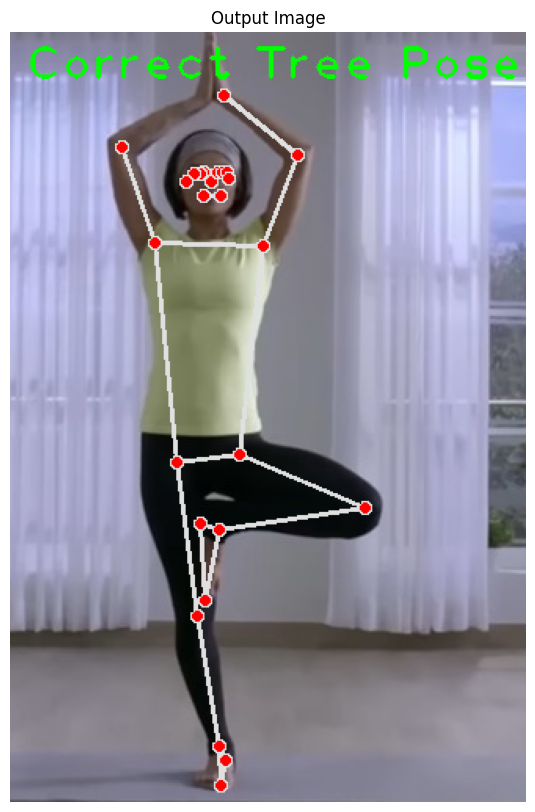

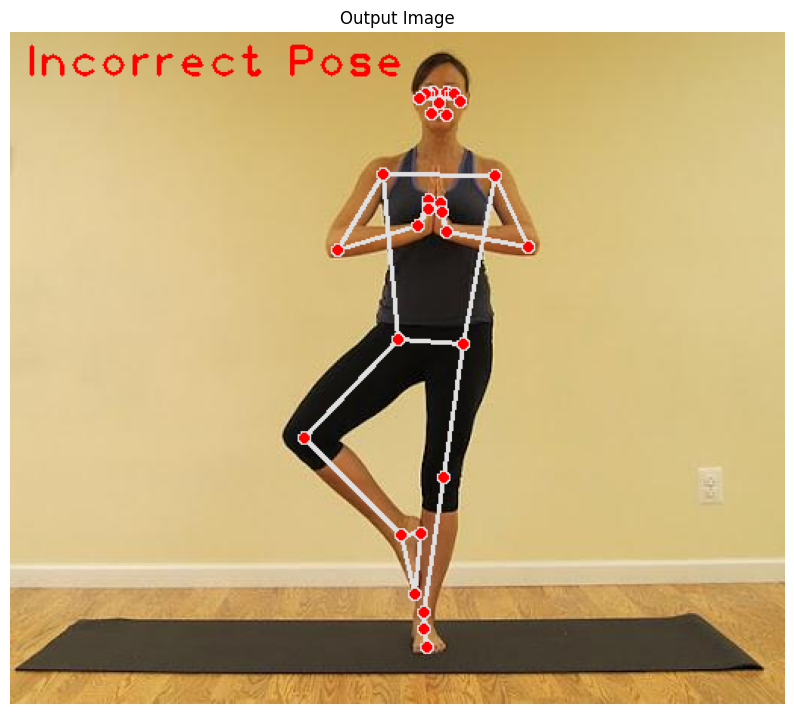

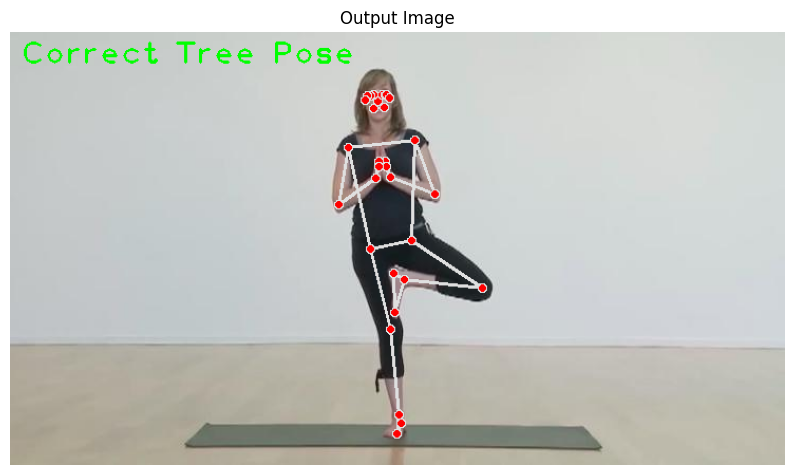

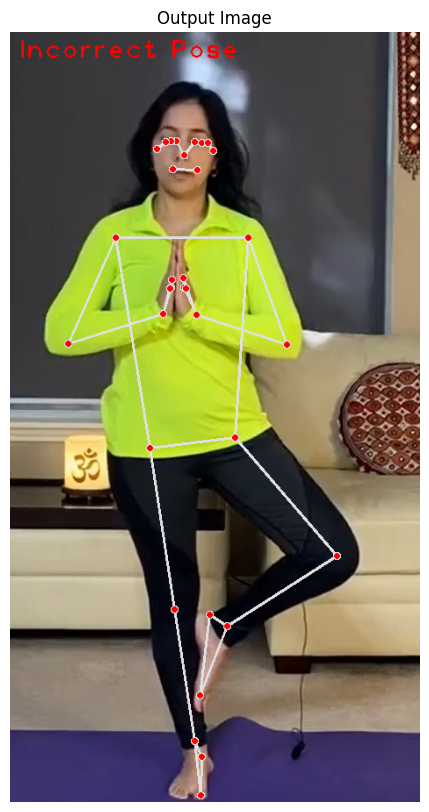

In [14]:
image1=cv2.imread('Tree_1.jpeg')
output_image1,landmarks=detectPose(image1,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image1,display=True)
image2=cv2.imread('Tree_2.jpeg')
output_image2,landmarks=detectPose(image2,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image2,display=True)
image6=cv2.imread('tree trial.jpeg')
output_image6,landmarks=detectPose(image6,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image6,display=True)
image8=cv2.imread('tree trial 2.jpeg')
output_image8,landmarks=detectPose(image8,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image8,display=True)

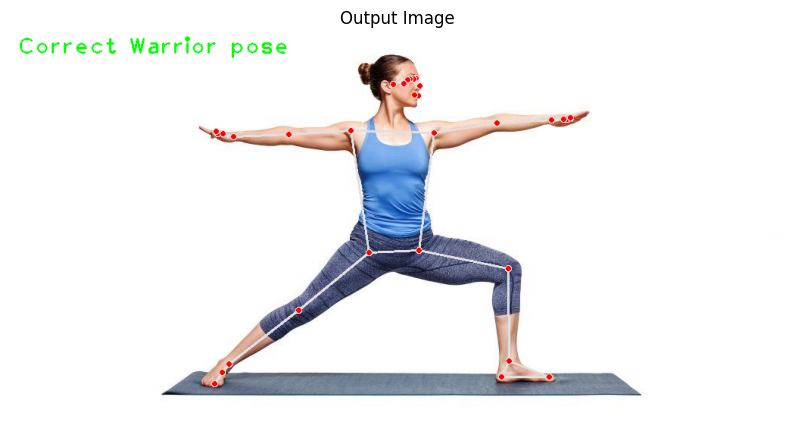

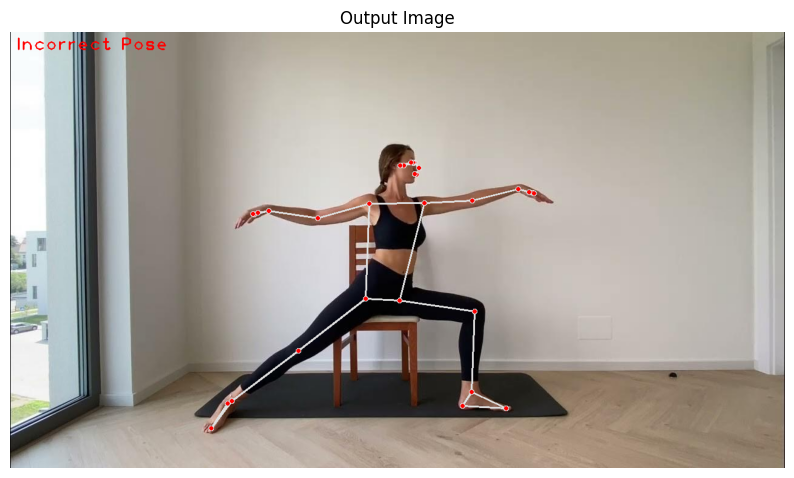

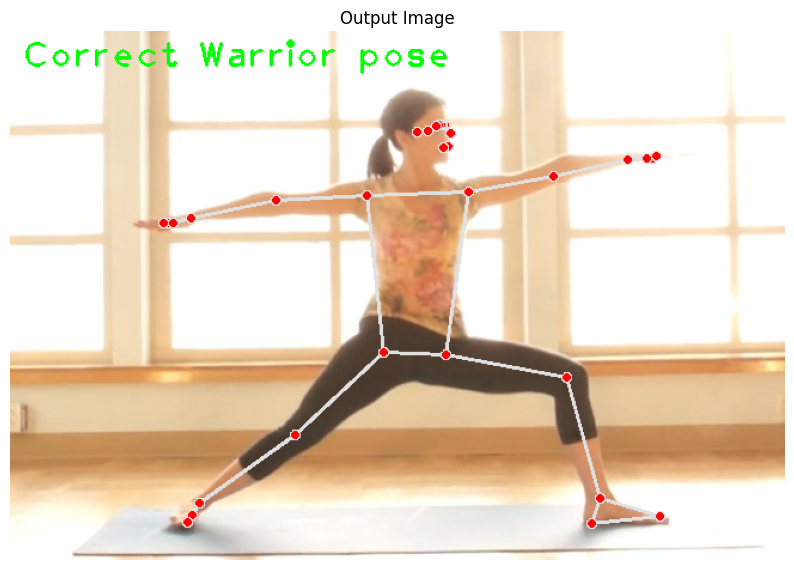

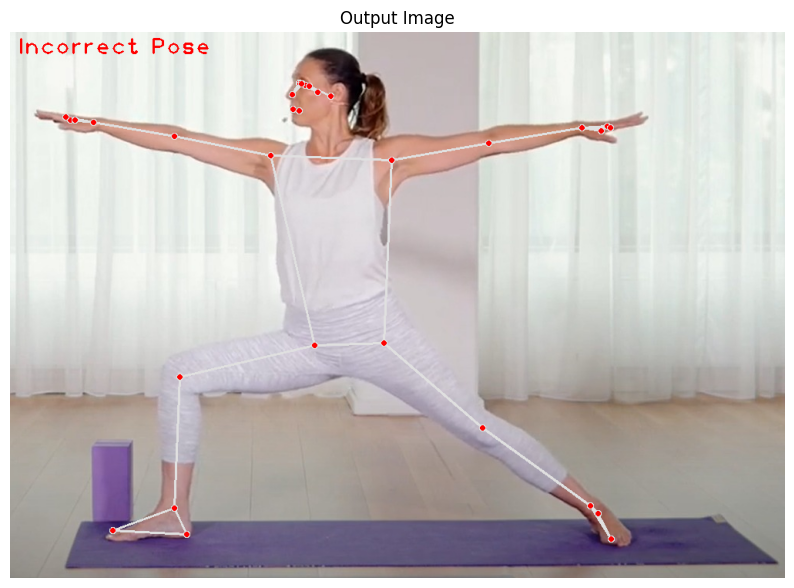

In [16]:
image3=cv2.imread('warrior_1.jpeg')
output_image3,landmarks=detectPose(image3,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image3,display=True)
image4=cv2.imread('warrior_2.jpeg')
output_image4,landmarks=detectPose(image4,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image4,display=True)
image5=cv2.imread('warrior trial 2.jpeg')
output_image5,landmarks=detectPose(image5,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image5,display=True)
image7=cv2.imread('warrior trial 3.jpeg')
output_image7,landmarks=detectPose(image7,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image7,display=True)